In [13]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.6.0
2.6.0


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [15]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [16]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [17]:
X_train_full.dtype

dtype('uint8')

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [18]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

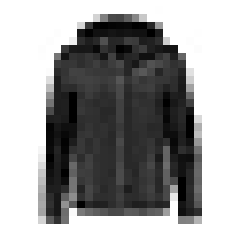

In [19]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [20]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Będziemy używać klas numerycznych i nazw.

In [21]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

Możemy narysować więcej przykładów treningowych.

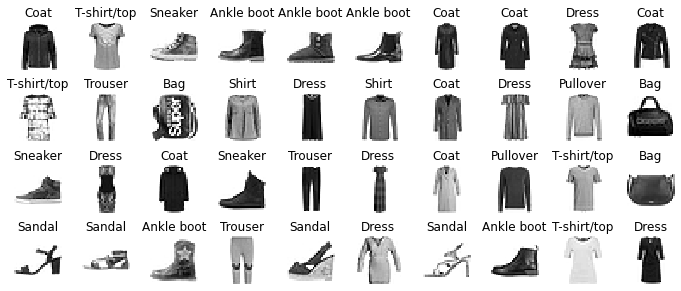

In [22]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad

Wykonaj analogiczne zadanie dla 
* Adam bez LearningRateScheduler i learning_rate=0.001
* Adam z użyciem LearningRateScheduler i learning_rate=0.001
* Adam z użyciem LearningRateScheduler i learning_rate=0.0001

Zwizualizuj wyniki:

* porównaj krzywe uczenia

In [23]:
from keras.callbacks import LearningRateScheduler
# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.01
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lrate

In [24]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history_adam_1 = History()
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

Adam_1 = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="sparse_categorical_crossentropy",optimizer=Adam_1, metrics=["accuracy"])

model.fit(X_train, y_train, validation_data= (X_valid, y_valid), batch_size=32,epochs=30, callbacks=[history_adam_1])

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4843 - accuracy: 0.8256 - val_loss: 0.3835 - val_accuracy: 0.8622
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3623 - accuracy: 0.8664 - val_loss: 0.3466 - val_accuracy: 0.8794
Epoch 3/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3280 - accuracy: 0.8780 - val_loss: 0.3137 - val_accuracy: 0.8848
Epoch 4/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3016 - accuracy: 0.8893 - val_loss: 0.3201 - val_accuracy: 0.8802
Epoch 5/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2839 - accuracy: 0.8922 - val_loss: 0.3032 - val_accuracy: 0.8874
Epoch 6/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.2690 - accuracy: 0.8998 - val_loss: 0.3129 - val_accuracy: 0.8862
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2587 - accuracy: 0.9024 - val_loss: 0.2984 - val_acc

In [25]:
history_adam_2 = History()
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

Adam_2 = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="sparse_categorical_crossentropy",optimizer=Adam_2, metrics=["accuracy"])

lrate = LearningRateScheduler(step_decay)
model.fit(X_train, y_train, validation_data= (X_valid, y_valid), batch_size=32,epochs=30, callbacks=[lrate, history_adam_2])

Epoch 1/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5526 - accuracy: 0.8026 - val_loss: 0.4346 - val_accuracy: 0.8494
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4439 - accuracy: 0.8415 - val_loss: 0.4101 - val_accuracy: 0.8576
Epoch 3/30
1719/1719 [==============================] - 15s 8ms/step - loss: 0.4174 - accuracy: 0.8509 - val_loss: 0.4141 - val_accuracy: 0.8592
Epoch 4/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4111 - accuracy: 0.8532 - val_loss: 0.3845 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3944 - accuracy: 0.8608 - val_loss: 0.4230 - val_accuracy: 0.8594
Epoch 6/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3869 - accuracy: 0.8619 - val_loss: 0.4233 - val_accuracy: 0.8668
Epoch 7/30
1719/1719 [==============================] - 15s 8ms/step - loss: 0.3835 - accuracy: 0.8625 - val_loss: 0.4167 - val_ac

In [26]:
history_adam_3 = History()
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

Adam_3 = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="sparse_categorical_crossentropy",optimizer=Adam_3, metrics=["accuracy"])

lrate = LearningRateScheduler(step_decay)
model.fit(X_train, y_train, validation_data= (X_valid, y_valid), batch_size=32,epochs=30, callbacks=[lrate, history_adam_3])


Epoch 1/30
1719/1719 [==============================] - 18s 10ms/step - loss: 0.5526 - accuracy: 0.8052 - val_loss: 0.4974 - val_accuracy: 0.8180
Epoch 2/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4422 - accuracy: 0.8452 - val_loss: 0.4805 - val_accuracy: 0.8416
Epoch 3/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4135 - accuracy: 0.8534 - val_loss: 0.3897 - val_accuracy: 0.8670
Epoch 4/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4104 - accuracy: 0.8576 - val_loss: 0.4102 - val_accuracy: 0.8640
Epoch 5/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3894 - accuracy: 0.8638 - val_loss: 0.3909 - val_accuracy: 0.8754
Epoch 6/30
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3850 - accuracy: 0.8670 - val_loss: 0.4643 - val_accuracy: 0.8562
Epoch 7/30
1719/1719 [==============================] - 17s 10ms/step - loss: 0.3740 - accuracy: 0.8710 - val_loss: 0.4103 - val_

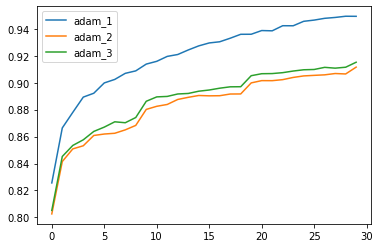

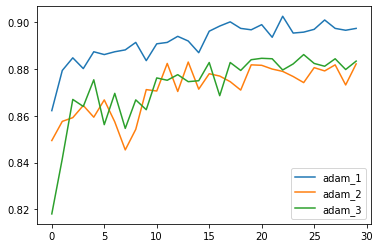

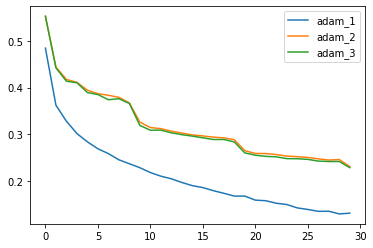

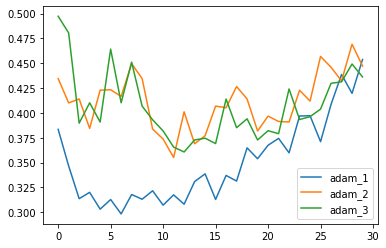

In [27]:
plt.plot(history_adam_1.history['accuracy'], label = "adam_1")
plt.plot(history_adam_2.history['accuracy'], label = "adam_2")
plt.plot(history_adam_3.history['accuracy'], label = "adam_3")
plt.legend()
plt.show()

plt.plot(history_adam_1.history['val_accuracy'], label = "adam_1")
plt.plot(history_adam_2.history['val_accuracy'], label = "adam_2")
plt.plot(history_adam_3.history['val_accuracy'], label = "adam_3")
plt.legend()
plt.show()

plt.plot(history_adam_1.history['loss'], label = "adam_1")
plt.plot(history_adam_2.history['loss'], label = "adam_2")
plt.plot(history_adam_3.history['loss'], label = "adam_3")
plt.legend()
plt.show()

plt.plot(history_adam_1.history['val_loss'], label = "adam_1")
plt.plot(history_adam_2.history['val_loss'], label = "adam_2")
plt.plot(history_adam_3.history['val_loss'], label = "adam_3")
plt.legend()
plt.show()